In [19]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from IPython.display import display

from disruption_survival_analysis.sweep_config import create_experiment_groups, get_experiments


from disruption_survival_analysis.plot_experiments import plot_true_alarm_rates_vs_thresholds, plot_false_alarm_rates_vs_thresholds, plot_warning_times_vs_thresholds
from disruption_survival_analysis.plot_experiments import plot_true_alarm_rates_vs_false_alarm_rates, plot_avg_warning_times_vs_false_alarm_rates


#device = 'synthetic'
#dataset_path = 'test'
devices = ['cmod']
dataset_paths = ['preliminary_dataset_no_ufo', 'preliminary_dataset_no_ufo/stack_6']

# models, alarms, metrics, and minimum warning times to use
models = ['cph', 'dsm', 'rf', 'km']
#models = ['rf']
alarms = ['sthr']
metrics = ['auroc', 'auwtc']
min_warning_times = [0.01, 0.05, 0.1, 0.2]

# Load models and create experiments
experiment_groups = create_experiment_groups(devices, dataset_paths, models, alarms, metrics, min_warning_times)

# C

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
---
Attempting to load hyperparameters from yaml file...
Loaded hyperparameters for cmod/preliminary_dataset_no_ufo/configs/cph_sthr_auroc_10ms.yaml
---
Loaded model from models/cmod/preliminary_dataset_no_ufo/cph_sthr_auroc_10ms.pkl
---
Attempting to load hyperparameters from yaml file...
Loaded hyperparameters for cmod/preliminary_dataset_no_ufo/configs/cph_sthr_auroc_50ms.yaml
---
Loaded model from models/cmod/preliminary_dataset_no_ufo/cph_sthr_auroc_50ms.pkl
---
Attempting to load hyperparameters from yaml file...
Loaded hyperparameters for cmod/preliminary_dataset_no_ufo/configs/cph_sthr_auroc_100ms.yaml
---
Loaded model from models/cmod/preliminary_dataset_no_ufo/cph_sthr_auroc_100ms.pkl
---
Attempting to load hyperparameters from yaml file...
Loaded hyperparameters for cmod/preliminary_dataset_no_ufo/configs/cph_sthr_auroc_200ms.yaml
---
Loaded model from models/cmod/preliminary_dataset_no_u

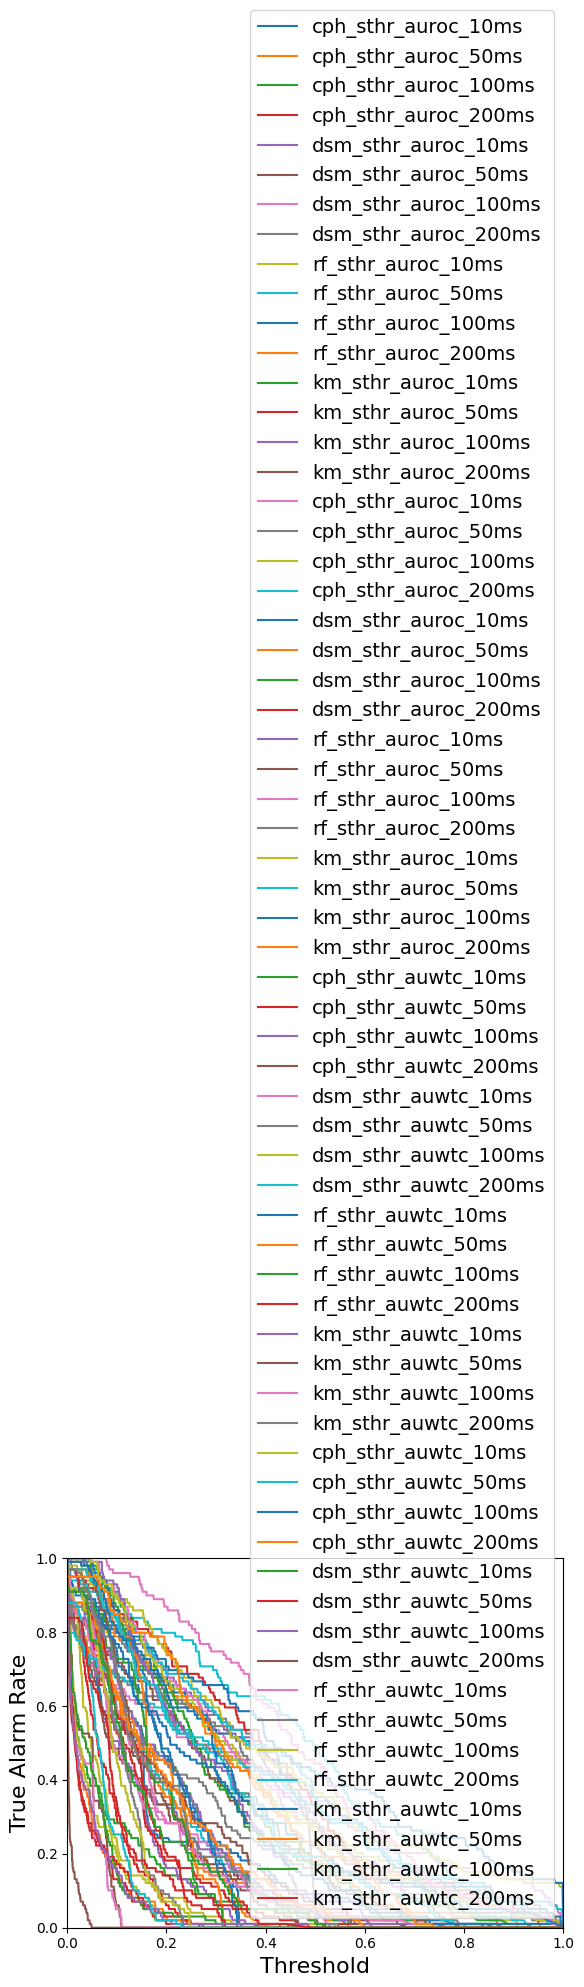

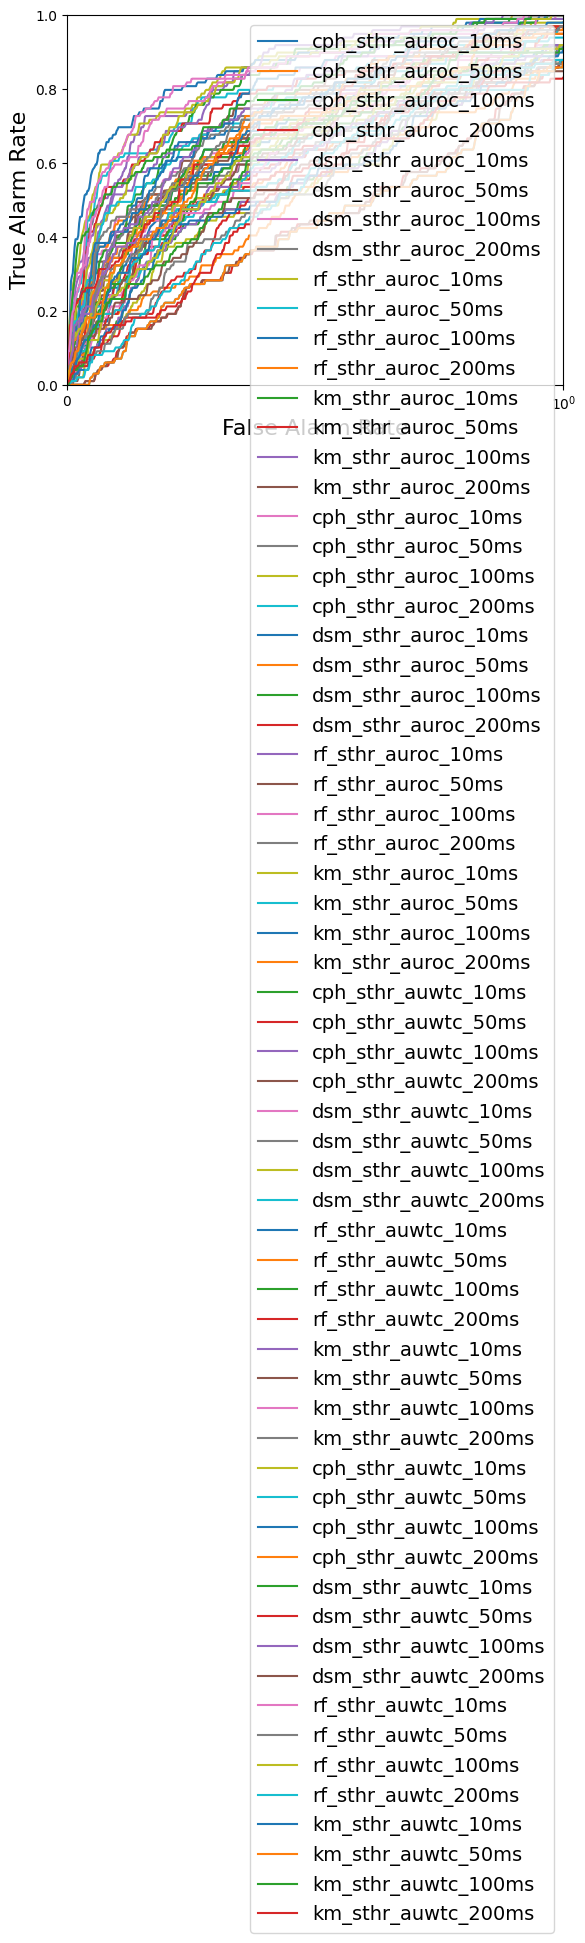

In [22]:
# Pre-compute and cache all values for all experiments
experiment_list = get_experiments(experiment_groups, ['auroc'], ['auwtc'])
plot_true_alarm_rates_vs_thresholds(experiment_list)
plot_true_alarm_rates_vs_false_alarm_rates(experiment_list)

## Threshold Plots



In [26]:
# Save experiment_groups to disk
import dill
with open('experiment_groups.pkl', 'wb') as f:
    dill.dump(experiment_groups, f)

In [ ]:
# Load experiment_groups from disk
import dill
with open('experiment_groups.pkl', 'rb') as f:
    experiment_groups = dill.load(f)

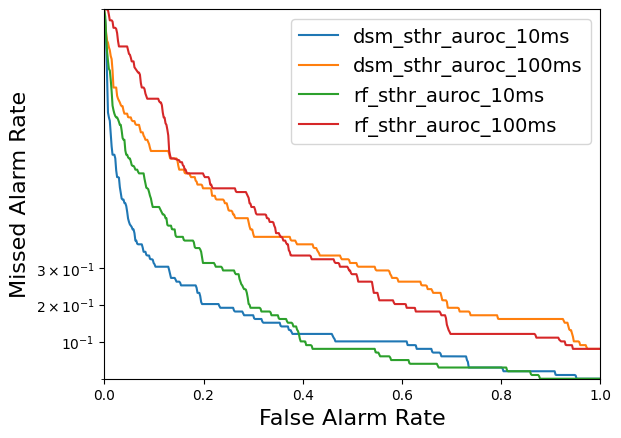

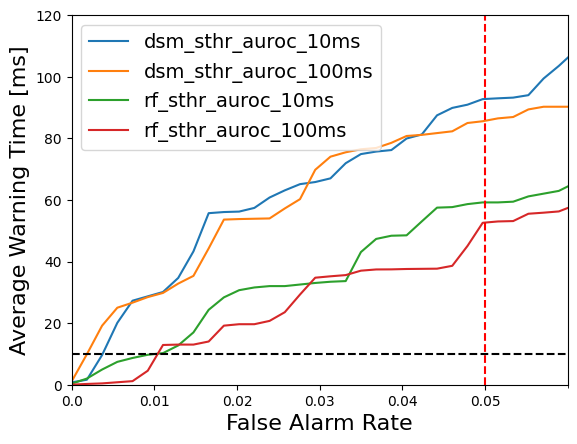

In [69]:
required_warning_time = 0.01
experiment_list = get_experiments(experiment_groups, 
                                  ['preliminary_dataset_no_ufo/stack_6', 'dsm', 'auroc', 0.01],
                                  ['preliminary_dataset_no_ufo/stack_6', 'dsm', 'auroc', 0.1],
                                  ['preliminary_dataset_no_ufo/stack_6', 'rf', 'auroc', 0.01],
                                  ['preliminary_dataset_no_ufo/stack_6', 'rf', 'auroc', 0.1])

plot_true_alarm_rates_vs_false_alarm_rates(experiment_list)
plot_avg_warning_times_vs_false_alarm_rates(experiment_list, required_warning_time)
#plot_true_alarm_rates_vs_thresholds(experiment_list)
#plot_false_alarm_rates_vs_thresholds(experiment_list)
#plot_warning_times_vs_thresholds(experiment_list)

## ROC Curve

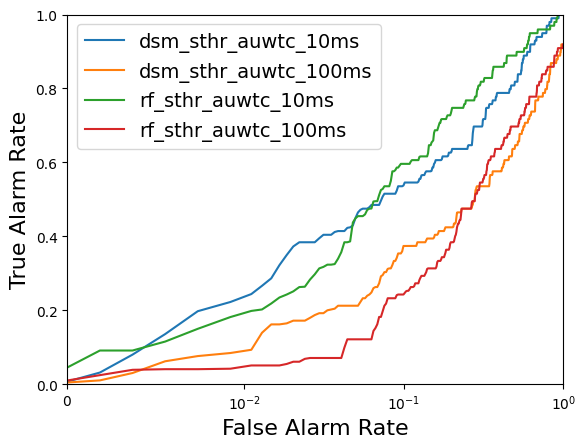

## Area Under Warning Time Curve



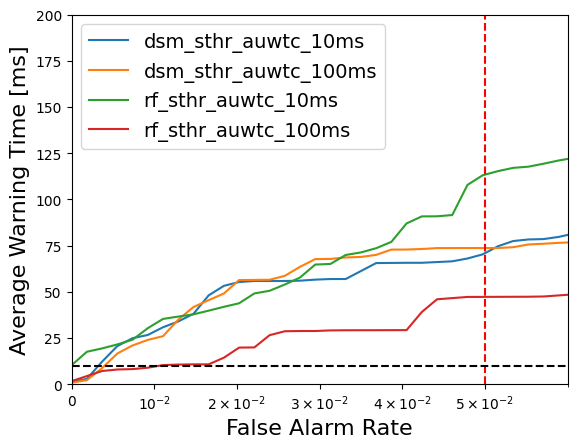